In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
try:
    df = pd.read_csv(r"C:\Users\mitch\OneDrive\Documenten\Studie Toegepaste wiskunde\Moduleren project\GBS_MOD_12082024.csv", sep = ';')
except:
    df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')
    

In [5]:
#df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')

In [6]:
df

,Patientcode,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,...,Comorbidity_respiration,Days_between_onset_and_admission,Date_onset_weakness,Continent,Country_of_inclusion,Surv_days,Surv_status,Surv_unable_to_walk,Walking_again,Deceased
0,P0001,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0.0,5.0,16-6-2016,1,5,125.0,1.0,1,1.0,0
1,P0002,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,22-11-2017,5,19,49.0,1.0,1,1.0,0
2,P0003,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,28-12-2020,2,11,752.0,0.0,1,NaN,0
3,P0004,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,...,0.0,10.0,30-3-2020,1,6,13.0,1.0,1,1.0,0
4,P0005,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,28-12-2015,1,2,14.0,0.0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,P1496,52.0,1,19.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,12.0,4-9-2016,1,5,26.0,0.0,1,NaN,0
1496,P1497,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,...,0.0,9.0,4-2-2017,1,1,30.0,1.0,1,1.0,0
1497,P1498,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,30-4-2017,6,21,42.0,1.0,1,1.0,0
1498,P1499,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,...,0.0,5.0,3-10-2017,3,13,280.0,1.0,1,1.0,0


In [7]:
# df.columns

In [8]:
# a =  df[['Surv_status', 'Deceased']]

In [9]:
# df.dtypes

In [10]:

# past de datum naar yyyy-mm-dd
# dan selecteer dan mm om de correlatie te bepalen met andere data
df['date_hospital'] = pd.to_datetime(df['Date_onset_weakness'], format = "%d-%m-%Y")
df['date_month'] = df['date_hospital'].dt.month

In [11]:
df = df.drop(columns = ['Patientcode','Date_onset_weakness'])
df['CSF_protein_level'] = df['CSF_protein_level'].str.replace(',','.').astype(float)

#df['Walking_again'] = df['Walking_again'].fillna(0)


In [12]:

corr_matrix = df.corr()
sorted_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack().sort_values(ascending=False)
sorted_corr

Country_of_inclusion  Continent                0.912135
MRC_sum_w1            MRC_sum_e                0.813435
Surv_unable_to_walk   GBSDS_e                  0.766703
GBSDS_w1              GBSDS_e                  0.762471
CNI_Oculomotor_w1     CNI_Oculomotor_e         0.758196
                                                 ...   
date_month            Ant_event_respiratory         NaN
                      Ant_event_vaccination         NaN
                      Ant_event_other               NaN
                      Walking_again                 NaN
                      date_month                    NaN
Length: 1369, dtype: float64

In [13]:
a = df.corr()['date_month'].sort_values(ascending=False)
print(a)


date_month                          1.000000
Country_of_inclusion                0.042215
Continent                           0.042008
CSF_protein_level                   0.034668
Deceased                            0.032537
Comorbidity_respiration             0.028531
GBSDS_w1                            0.027320
Sens_deficits_e                     0.024639
date_hospital                       0.016433
Able_to_walk_e                      0.014984
Surv_status                         0.009699
GBSDS_e                             0.007570
Sens_deficits_w1                    0.004381
Pain_e                              0.003648
Days_between_onset_and_admission    0.000450
Pain_w1                             0.000274
CNI_Bulbar_w1                      -0.000925
CNI_Bulbar_e                       -0.005650
Surv_unable_to_walk                -0.007161
Surv_days                          -0.012387
Able_to_walk_w1                    -0.013766
CNI_e                              -0.017687
CNI_Facial

In [14]:
df['Continent'].value_counts()

Continent
1    878
2    178
5    176
4    164
3     71
6     33
Name: count, dtype: int64

In [15]:
df['Country_of_inclusion'].value_counts(sort=True)

Country_of_inclusion
1     196
19    176
11    161
6     160
5     130
2     129
7     102
18     66
15     63
3      60
13     51
8      40
10     34
17     28
21     25
4      18
12     17
14     16
9      16
16      6
20      6
Name: count, dtype: int64

<Axes: xlabel='Country_of_inclusion', ylabel='count'>

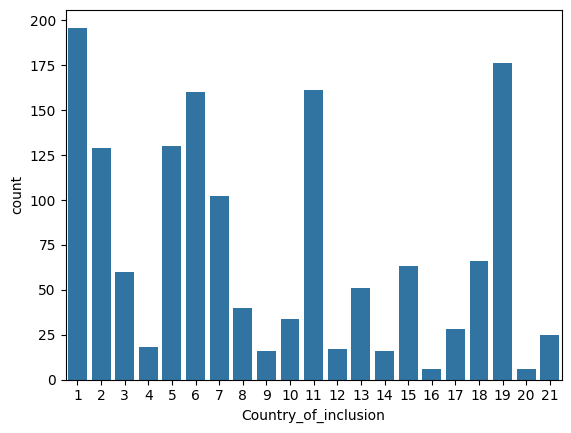

In [16]:
# sns.countplot(df,x='Continent')
sns.countplot(data  =df,x='Country_of_inclusion')

In [17]:
data = {
    'country_code': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'country_name': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada', 'Argentinië', 'Brazilië', 'Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh', 'Australië', 'Zuid-Afrika']
}


df_klimaat = pd.DataFrame(data)

climate_data = {
    'A_Klimaat': ['Maleisië', 'Bangladesh', 'Brazilië'],
    'B_Klimaat': ['Spanje'],
    'C_Klimaat': ['Nederland', 'Verenigd Koninkrijk', 'België', 'Denemarken', 'Duitsland', 'Frankrijk', 'Italië', 'Griekenland', 'Zwitserland', 'Argentinië', 'Japan', 'Taiwan', 'China', 'Australië', 'Zuid-Afrika'],
    'D_Klimaat': ['Verenigde Staten', 'Canada']
}

# Function to assign the climate category based on the country
def assign_climate(country):
    if country in climate_data['A_Klimaat']:
        return 'A Klimaat'
    elif country in climate_data['B_Klimaat']:
        return 'B Klimaat'
    elif country in climate_data['C_Klimaat']:
        return 'C Klimaat'
    elif country in climate_data['D_Klimaat']:
        return 'D Klimaat'
    else:
        return 'Unknown'

# Add a new column 'Climate' to the dataframe
df_klimaat['klimaat'] = df_klimaat['country_name'].apply(assign_climate)


print(df_klimaat)


    country_code         country_name    klimaat
0              1            Nederland  C Klimaat
1              2  Verenigd Koninkrijk  C Klimaat
2              3            Duitsland  C Klimaat
3              4               België  C Klimaat
4              5           Denemarken  C Klimaat
5              6               Italië  C Klimaat
6              7               Spanje  B Klimaat
7              8            Frankrijk  C Klimaat
8              9          Griekenland  C Klimaat
9             10          Zwitserland  C Klimaat
10            11     Verenigde Staten  D Klimaat
11            12               Canada  D Klimaat
12            13           Argentinië  C Klimaat
13            14             Brazilië  A Klimaat
14            15                Japan  C Klimaat
15            16               Taiwan  C Klimaat
16            17             Maleisië  A Klimaat
17            18                China  C Klimaat
18            19           Bangladesh  A Klimaat
19            20    

In [18]:
# df en df_klimaat joinen op elkaar
df = pd.merge(df, df_klimaat, 
                     left_on='Country_of_inclusion', right_on='country_code',
                     how = 'left')

df = df.drop(columns = 'country_code')

<Axes: xlabel='klimaat', ylabel='count'>

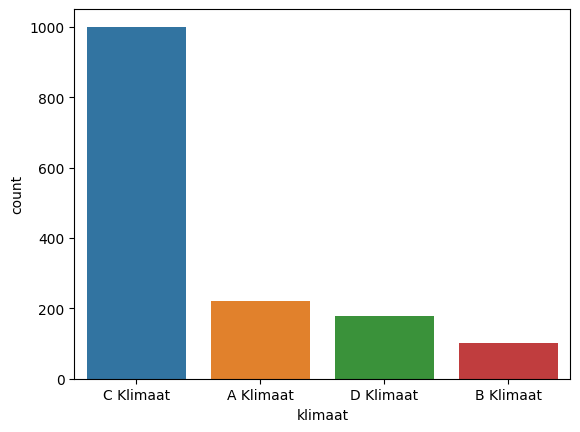

In [19]:

sns.countplot(data = df,x='klimaat', hue = 'klimaat')

In [20]:
df['klimaat'].value_counts()

klimaat
C Klimaat    1000
A Klimaat     220
D Klimaat     178
B Klimaat     102
Name: count, dtype: int64

Text(0.5, 1.0, 'Verdeling hoeveelheid GBS per hafrond')

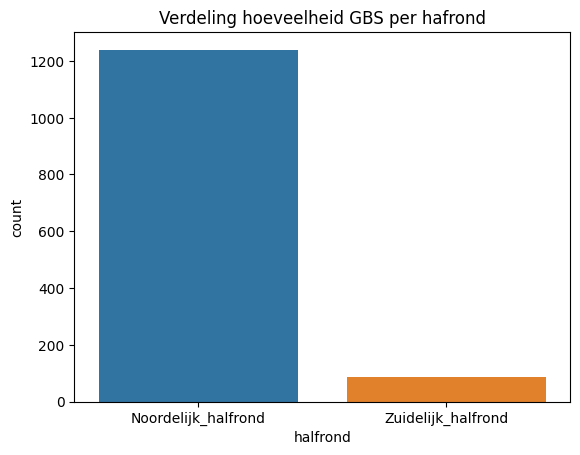

In [223]:
halfrond_data = {
    'Noordelijk_halfrond': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada','Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh'],

    'Zuidelijk_halfrond': ['Argentinië','Brazilië','Australië', 'Zuid-Afrika']
}


def assign_halfrond(country):
    if country in halfrond_data['Noordelijk_halfrond']:
        return 'Noordelijk_halfrond'
    elif country in halfrond_data['Zuidelijk_halfrond']:
        return 'Zuidelijk_halfrond'


df['halfrond'] = df['country_name'].apply(assign_halfrond)


sns.countplot(data = df, x='halfrond', hue = 'halfrond').set_title('Verdeling hoeveelheid GBS per hafrond')

Seizoenen definieren opbasis van de halfrond.

Noordelijk_halfrond: lente 3-5, zomer 6-8, herfst 9-11, winter 12-2

Zuidelijk halfrond: lente 9-11, zomer 12-2, herfst 3-5, winter 6-8

In [22]:
def seizoenen(halfrond, date_month):
    seizoen1 = [12,1,2]
    seizoen2 = [3,4,5]
    seizoen3 = [6,7,8]
    seizoen4 = [9,10,11]
    if str(halfrond) == 'Noordelijk_halfrond':
        if date_month in seizoen1:
            return "Winter"
        elif date_month in seizoen2:
            return "Lente"
        elif date_month in seizoen3:
            return "Zomer"
        elif date_month in seizoen4:
            return "Herfst"
        else:
            return None
    elif str(halfrond) == 'Zuidelijk_halfrond':
        if date_month in seizoen1:
            return "Zomer"
        elif date_month in seizoen2:
            return "Herfst"
        elif date_month in seizoen3:
            return "Winter"
        elif date_month in seizoen4:
            return "Lente"
        else:
            return None
    else:
        print("help")
    



In [23]:
df['halfrond'].dtype

dtype('O')

In [24]:
df['Seizoen'] = df.apply(lambda row: seizoenen(row['halfrond'], row['date_month']), axis=1)

In [25]:
# a = df[['country_name','date_month','Seizoen']]
# print(a)

Text(0.5, 1.0, 'Verdeling hoeveelheid GBS per seizoen')

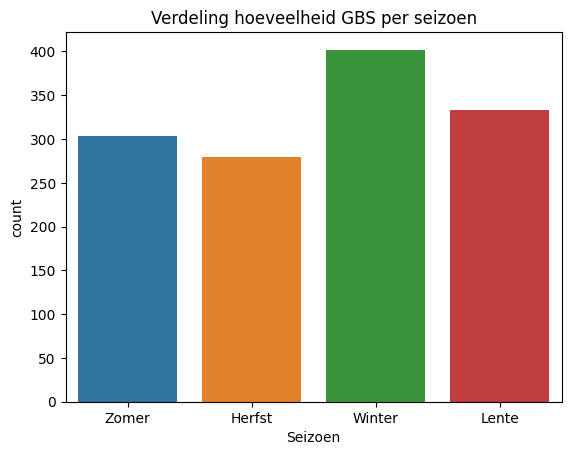

In [224]:
sns.countplot(data = df,x='Seizoen', hue = 'Seizoen', legend= False).set_title('Verdeling hoeveelheid GBS per seizoen')

In [27]:
Klimaat_Seizoen = pd.crosstab(df['klimaat'], df['Seizoen'])

stats.chi2_contingency(Klimaat_Seizoen)

Chi2ContingencyResult(statistic=3.7451420362510364, pvalue=0.9273719105102436, dof=9, expected_freq=array([[ 46.85372522,  56.13465482,  66.76281613,  49.24880383],
       [ 21.18045113,  25.37593985,  30.18045113,  22.26315789],
       [208.38140807, 249.6582365 , 296.92686261, 219.03349282],
       [ 36.58441558,  43.83116883,  52.12987013,  38.45454545]]))

De chi-kwadraat toets geeft een p-waarde van 0,9237.... dat is hoger dan 0,05. Dus de 0-hypothese wordt bewaard.
De 0 hypothese is dat de 2 variabelen statistisch onafhankelijk zijn.

Eerst kijken hoeveel NA er zijn in de dataset. Om te bepalen welke vorm van NA-handling wordt toegepast

In [28]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 9
Sex : 0
MRC_sum_e : 50
MRC_sum_w1 : 183
CNI_e : 33
CNI_Bulbar_e : 33
CNI_Facial_e : 33
CNI_Oculomotor_e : 33
CNI_w1 : 175
CNI_Bulbar_w1 : 189
CNI_Facial_w1 : 189
CNI_Oculomotor_w1 : 189
Pain_e : 35
Pain_w1 : 171
Sens_deficits_e : 40
Sens_deficits_w1 : 182
Ant_event : 98
Ant_event_GE : 1105
Ant_event_respiratory : 917
Ant_event_vaccination : 1464
Ant_event_other : 1429
GBSDS_e : 40
Able_to_walk_e : 40
GBSDS_w1 : 178
Able_to_walk_w1 : 178
CSF_protein_level : 180
Comorbidity_respiration : 32
Days_between_onset_and_admission : 40
Continent : 0
Country_of_inclusion : 0
Surv_days : 367
Surv_status : 363
Surv_unable_to_walk : 0
Walking_again : 606
Deceased : 0
date_hospital : 37
date_month : 37
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 37


In [29]:
df = df.dropna(thresh= df.shape[1]-10)
df

,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,CNI_Bulbar_w1,...,Surv_status,Surv_unable_to_walk,Walking_again,Deceased,date_hospital,date_month,country_name,klimaat,halfrond,Seizoen
0,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1,1.0,0,2016-06-16,6.0,Denemarken,C Klimaat,Noordelijk_halfrond,Zomer
1,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,1.0,0,2017-11-22,11.0,Bangladesh,A Klimaat,Noordelijk_halfrond,Herfst
2,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,0,2020-12-28,12.0,Verenigde Staten,D Klimaat,Noordelijk_halfrond,Winter
3,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1,1.0,0,2020-03-30,3.0,Italië,C Klimaat,Noordelijk_halfrond,Lente
4,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1,NaN,0,2015-12-28,12.0,Verenigd Koninkrijk,C Klimaat,Noordelijk_halfrond,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,69.0,0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,0,2016-02-12,2.0,Taiwan,C Klimaat,Noordelijk_halfrond,Winter
1496,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1,1.0,0,2017-02-04,2.0,Nederland,C Klimaat,Noordelijk_halfrond,Winter
1497,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1,1.0,0,2017-04-30,4.0,Zuid-Afrika,C Klimaat,Zuidelijk_halfrond,Herfst
1498,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1,1.0,0,2017-10-03,10.0,Argentinië,C Klimaat,Zuidelijk_halfrond,Lente


In [30]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 967
Ant_event_respiratory : 813
Ant_event_vaccination : 1297
Ant_event_other : 1259
GBSDS_e : 8
Able_to_walk_e : 8
GBSDS_w1 : 10
Able_to_walk_w1 : 10
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 287
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_hospital : 7
date_month : 7
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 7


In [31]:
df[df['Ant_event'].isna() == False]['Ant_event'].count()

1242

In [32]:
df[df['Ant_event_GE'].isna() == False]['Ant_event_GE'].count()

358

In [33]:
df['Ant_event_GE']

0       1.0
1       NaN
2       NaN
3       NaN
4       1.0
       ... 
1494    NaN
1496    NaN
1497    NaN
1498    NaN
1499    NaN
Name: Ant_event_GE, Length: 1325, dtype: float64

In [34]:
df['Ant_event'].value_counts()

Ant_event
1.0    950
0.0    292
Name: count, dtype: int64

In [35]:
df['Ant_event_GE'].isna().sum()

967

In [36]:
df['Ant_event_GE'].value_counts()

Ant_event_GE
1.0    358
Name: count, dtype: int64

In [37]:
df['Ant_event_GE'] = df['Ant_event_GE'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [38]:
df['Ant_event_GE'].isna().sum()

83

In [39]:
df['Ant_event_GE'].value_counts()


Ant_event_GE
0.0    884
1.0    358
Name: count, dtype: int64

In [40]:
df['Ant_event_respiratory'] = df['Ant_event_respiratory'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [41]:
df['Ant_event_vaccination'] = df['Ant_event_vaccination'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [42]:
df['Ant_event_other'] = df['Ant_event_other'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [43]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 83
Ant_event_respiratory : 83
Ant_event_vaccination : 83
Ant_event_other : 83
GBSDS_e : 8
Able_to_walk_e : 8
GBSDS_w1 : 10
Able_to_walk_w1 : 10
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 287
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_hospital : 7
date_month : 7
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 7


In [44]:
df_2  = df[['Able_to_walk_e','Able_to_walk_w1','Surv_unable_to_walk','Walking_again']]

In [45]:
df_2

,Able_to_walk_e,Able_to_walk_w1,Surv_unable_to_walk,Walking_again
0,0.0,0.0,1,1.0
1,0.0,0.0,1,1.0
2,0.0,0.0,1,NaN
3,0.0,1.0,1,1.0
4,0.0,0.0,1,NaN
...,...,...,...,...
1494,0.0,0.0,1,NaN
1496,0.0,0.0,1,1.0
1497,0.0,0.0,1,1.0
1498,0.0,0.0,1,1.0


In [46]:
df_lopers = df_2[df_2['Surv_unable_to_walk'] == 0]

In [47]:
print(df_lopers['Able_to_walk_e'].value_counts(), '\n',
    df_lopers['Able_to_walk_w1'].value_counts(), '\n',
    df_lopers['Surv_unable_to_walk'].value_counts(), '\n',
    'walking_again', df_lopers['Walking_again'].value_counts())


Able_to_walk_e
1.0    268
Name: count, dtype: int64 
 Able_to_walk_w1
1.0    268
Name: count, dtype: int64 
 Surv_unable_to_walk
0    270
Name: count, dtype: int64 
 walking_again Series([], Name: count, dtype: int64)


In [48]:
df_NietLopers = df_2[df_2['Surv_unable_to_walk'] == 1]

In [49]:
df_NietLopers

,Able_to_walk_e,Able_to_walk_w1,Surv_unable_to_walk,Walking_again
0,0.0,0.0,1,1.0
1,0.0,0.0,1,1.0
2,0.0,0.0,1,NaN
3,0.0,1.0,1,1.0
4,0.0,0.0,1,NaN
...,...,...,...,...
1494,0.0,0.0,1,NaN
1496,0.0,0.0,1,1.0
1497,0.0,0.0,1,1.0
1498,0.0,0.0,1,1.0


In [50]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

Able_to_walk_e
0.0    982
1.0    335
Name: count, dtype: int64 
 Able_to_walk_w1
0.0    907
1.0    408
Name: count, dtype: int64


In [51]:
df['Able_to_walk_e'] = df['Able_to_walk_e'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [52]:
df['Able_to_walk_w1'] = df['Able_to_walk_w1'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [53]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

Able_to_walk_e
0.0    982
1.0    337
Name: count, dtype: int64 
 Able_to_walk_w1
0.0    907
1.0    410
Name: count, dtype: int64


In [54]:
df['Surv_status'] = df['Surv_status'].fillna(0)

In [55]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 83
Ant_event_respiratory : 83
Ant_event_vaccination : 83
Ant_event_other : 83
GBSDS_e : 8
Able_to_walk_e : 6
GBSDS_w1 : 10
Able_to_walk_w1 : 8
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 0
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_hospital : 7
date_month : 7
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 7


In [56]:
freq_table = pd.crosstab(df['klimaat'], df['Seizoen']) 
freq_table

Seizoen,Herfst,Lente,Winter,Zomer
klimaat,,,,
A Klimaat,47,58,57,43
B Klimaat,20,24,27,18
C Klimaat,175,218,271,208
D Klimaat,38,33,47,34


In [57]:
df_A = df[df['klimaat'] == 'A Klimaat']
df_B = df[df['klimaat'] == 'B Klimaat']
df_C = df[df['klimaat'] == 'C Klimaat']
df_D = df[df['klimaat'] == 'D Klimaat']

In [58]:
dataframes_klimaat = [df_A, df_B, df_C, df_D]
for i in dataframes_klimaat:
    print(i['klimaat'].value_counts()) 
    

klimaat
A Klimaat    206
Name: count, dtype: int64
klimaat
B Klimaat    90
Name: count, dtype: int64
klimaat
C Klimaat    875
Name: count, dtype: int64
klimaat
D Klimaat    154
Name: count, dtype: int64


Uit deze code is te zien dat alle klimaten op juiste wijze zijn gesplitst

In [59]:
df_lente = df[df['Seizoen'] == 'Lente']
df_zomer = df[df['Seizoen'] == 'Zomer']
df_herfst = df[df['Seizoen'] == 'Herfst']
df_winter = df[df['Seizoen'] == 'Winter']

In [60]:
dataframes_seizoen = [df_lente, df_zomer, df_herfst, df_winter]
for i in dataframes_seizoen:
    print(i['Seizoen'].value_counts()) 
    

Seizoen
Lente    333
Name: count, dtype: int64
Seizoen
Zomer    303
Name: count, dtype: int64
Seizoen
Herfst    280
Name: count, dtype: int64
Seizoen
Winter    402
Name: count, dtype: int64


In [61]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Deceased'], dateframe['Seizoen']) 
    print(freq_table, '\n')
  

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             44     58      55     40
1              3      0       2      3 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             19     24      26     18
1              1      0       1      0 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0            168    208     261    200
1              7     10      10      8 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             38     32      47     32
1              0      1       0      2 



Wat in deze tabel is te zien dat er te weinig waarden apart zijn om de chi-kwadraat toets uit te voeren, daarom wordt voor het geheel de chi-kwadraat en voor C klimaat de test uitgevoerd. Omdat dit geen 2 bij 2 matrices zijn mag de fishers exact toets ook niet worden uitgevoerd

In [62]:
Seizoen_dood = pd.crosstab(df['Seizoen'], df['Deceased'])
stats.chi2_contingency(Seizoen_dood)

Chi2ContingencyResult(statistic=0.7282704121038908, pvalue=0.8665351698920313, dof=3, expected_freq=array([[269.80273141,  10.19726859],
       [320.87253414,  12.12746586],
       [387.35963581,  14.64036419],
       [291.96509863,  11.03490137]]))

In [63]:
Seizoen_dood = pd.crosstab(df_C['Seizoen'], df_C['Deceased'])
stats.chi2_contingency(Seizoen_dood)

Chi2ContingencyResult(statistic=0.2750069819875797, pvalue=0.9646583492928525, dof=3, expected_freq=array([[167.97591743,   7.02408257],
       [209.25      ,   8.75      ],
       [260.12270642,  10.87729358],
       [199.65137615,   8.34862385]]))

In [64]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Surv_status'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              11     15      13     11
1.0              33     43      42     29
2.0               3      0       2      3 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0               7     11       7     10
1.0              12     13      19      8
2.0               1      0       1      0 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              52     73      90     81
1.0             116    135     171    119
2.0               7     10      10      8 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              14     15      15      5
1.0              24     17      32     27
2.0               0      1       0      2 



Voor de surv_status geldt hetzelfde al voor deceaced

In [65]:
Seizoen_surv_status = pd.crosstab(df['Seizoen'], df['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

Chi2ContingencyResult(statistic=3.6084050021635243, pvalue=0.7294954618148062, dof=6, expected_freq=array([[ 91.35053111, 178.4522003 ,  10.19726859],
       [108.64188164, 212.2306525 ,  12.12746586],
       [131.15326252, 256.20637329,  14.64036419],
       [ 98.85432473, 193.1107739 ,  11.03490137]]))

In [66]:
Seizoen_surv_status = pd.crosstab(df_C['Seizoen'], df_C['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

Chi2ContingencyResult(statistic=4.113168019450811, pvalue=0.6613648188238734, dof=6, expected_freq=array([[ 59.40366972, 108.57224771,   7.02408257],
       [ 74.        , 135.25      ,   8.75      ],
       [ 91.99082569, 168.13188073,  10.87729358],
       [ 70.60550459, 129.04587156,   8.34862385]]))

Algemene CNI

In [67]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          30     27      30     20
1.0          17     31      27     23 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          13     15      14     12
1.0           7      9      13      6 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          83    111     149    112
1.0          92    106     121     96
2.0           0      1       1      0 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_e                                
0.0          19     14      28     21
1.0          19     18      19     13
2.0           0      1       0      0 



In [68]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          29     26      32     19
1.0          16     29      24     24
2.0           1      3       1      0 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          15     13      15     13
1.0           5     11      12      5 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          87    107     144    112
1.0          84    107     124     96
2.0           3      2       3      0 

Seizoen  Herfst  Lente  Winter  Zomer
CNI_w1                               
0.0          20     17      26     20
1.0          18     15      21     14
2.0           0      1       0      0 



CNI Bulbular

In [69]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Bulbar_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0               38     40      40     28
1.0                9     18      17     15 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0               16     19      21     12
1.0                4      5       6      6 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0              118    165     206    163
1.0               57     52      64     45
2.0                0      1       1      0 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Bulbar_e                              
0.0               30     25      36     27
1.0                8      7      11      7
2.0                0      1       0      0 



In [70]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Bulbar_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0                37     40      40     29
1.0                 8     15      16     14 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0                16     19      22     15
1.0                 4      5       5      3 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0               125    164     217    166
1.0                46     50      51     42 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Bulbar_w1                              
0.0                31     24      36     27
1.0                 7      8      11      7 



CNI facial

In [71]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Facial_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0               37     36      40     30
1.0               10     22      17     13 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0               15     22      22     15
1.0                5      2       5      3 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0              122    155     201    147
1.0               53     62      69     61
2.0                0      1       1      0 

Seizoen       Herfst  Lente  Winter  Zomer
CNI_Facial_e                              
0.0               23     26      35     25
1.0               15      6      12      9
2.0                0      1       0      0 



In [72]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Facial_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0                34     31      39     28
1.0                11     24      17     15 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0                16     19      18     16
1.0                 4      5       9      2 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0               118    145     181    144
1.0                53     69      87     64 

Seizoen        Herfst  Lente  Winter  Zomer
CNI_Facial_w1                              
0.0                22     26      31     26
1.0                16      6      16      8 



CNI Oculomotor

In [73]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                   41     50      49     38
1.0                    6      8       8      5 

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                   20     19      23     15
1.0                    0      5       4      3 

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                  154    178     223    172
1.0                   21     39      47     36
2.0                    0      1       1      0 

Seizoen           Herfst  Lente  Winter  Zomer
CNI_Oculomotor_e                              
0.0                   36     22      41     29
1.0                    2     10       6      5
2.0                    0      1       0      0 



In [74]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                    39     48      49     36
1.0                     6      7       7      7 

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                    20     18      24     16
1.0                     0      6       3      2 

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                   149    177     223    172
1.0                    22     37      45     36 

Seizoen            Herfst  Lente  Winter  Zomer
CNI_Oculomotor_w1                              
0.0                    35     25      42     28
1.0                     3      7       5      6 



In deze voorbeelden is te zien dat voor alle CNI evenementen niet genoeg waarden zijn bij de waarden van 2.0, nou is optie 2 niet mogelijk te bepalen, wat positief zou kunnen uitpakken. daarom worden die uit de dataset gehaald nu. Op de agemene CNI na komt de waarde 2.0 ook niet eens voor in dataset.

In [75]:
df_CNI = df
df_A_CNI = df_A
df_B_CNI = df_B
df_C_CNI = df_C
df_D_CNI = df_D
CNI_var = ['CNI_e', 'CNI_w1', 'CNI_Bulbar_e', 'CNI_Facial_e', 'CNI_Oculomotor_e']

In [76]:
for var in CNI_var:
    df_CNI = df_CNI.drop(df_CNI[df_CNI[var] == 2].index)
    df_A_CNI = df_A_CNI.drop(df_A_CNI[df_A_CNI[var] == 2].index)
    df_B_CNI = df_B_CNI.drop(df_B_CNI[df_B_CNI[var] == 2].index)
    df_C_CNI = df_C_CNI.drop(df_C_CNI[df_C_CNI[var] == 2].index)
    df_D_CNI = df_D_CNI.drop(df_D_CNI[df_D_CNI[var] == 2].index)

In [77]:
df_CNI['CNI_w1'].unique()

array([ 1.,  0., nan])

In [78]:
dataframes_CNI = [df_CNI, df_A_CNI, df_B_CNI, df_C_CNI, df_D_CNI]

In [79]:
#for dateframe in dataframes_CNI:
#    freq_table = pd.crosstab(dateframe['CNI_Oculomotor_e'], dateframe['Seizoen']) 
#   print(freq_table, '\n')

In [80]:
CNI_var_e = ['CNI_e', 'CNI_Bulbar_e', 'CNI_Facial_e', 'CNI_Oculomotor_e']
CNI_var_w1 = ['CNI_w1', 'CNI_Bulbar_w1', 'CNI_Facial_w1', 'CNI_Oculomotor_w1']

In [81]:
for var in CNI_var_e:
    print(var, '\n')
    for dataframe in dataframes_CNI:
        Seizoen_CNI = pd.crosstab(dataframe['Seizoen'], dataframe[var])
        print(stats.chi2_contingency(Seizoen_CNI))

CNI_e 

Chi2ContingencyResult(statistic=2.187129110001867, pvalue=0.534487982644873, dof=3, expected_freq=array([[146.90322581, 129.09677419],
       [173.51612903, 152.48387097],
       [211.30645161, 185.69354839],
       [161.27419355, 141.72580645]]))
Chi2ContingencyResult(statistic=3.297331085253876, pvalue=0.3480142807496441, dof=3, expected_freq=array([[24.15 , 21.85 ],
       [28.875, 26.125],
       [29.4  , 26.6  ],
       [22.575, 20.425]]))
Chi2ContingencyResult(statistic=1.3420198902606308, pvalue=0.7191800379842723, dof=3, expected_freq=array([[12.13483146,  7.86516854],
       [14.56179775,  9.43820225],
       [16.38202247, 10.61797753],
       [10.92134831,  7.07865169]]))
Chi2ContingencyResult(statistic=2.5914932955730317, pvalue=0.45898283415090624, dof=3, expected_freq=array([[ 90.19025522,  81.80974478],
       [112.73781903, 102.26218097],
       [140.00464037, 126.99535963],
       [109.06728538,  98.93271462]]))
Chi2ContingencyResult(statistic=3.0088533862361535

Hieruit is te zien dat CNI_Oculomotor_e voor alle klimaten samen en voor D klimaat statistisch significant afwijkt

In [82]:
Seizoen_CNI = pd.crosstab(df_CNI['Seizoen'], df_CNI['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=9.2924102271231, pvalue=0.025645467673540617, dof=3, expected_freq=array([[232.96774194,  43.03225806],
       [275.17204301,  50.82795699],
       [335.10215054,  61.89784946],
       [255.75806452,  47.24193548]]))

In [83]:
Seizoen_CNI = pd.crosstab(df_D_CNI['Seizoen'], df_D_CNI['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=9.512319016409421, pvalue=0.023200667266433474, dof=3, expected_freq=array([[32.21192053,  5.78807947],
       [27.12582781,  4.87417219],
       [39.8410596 ,  7.1589404 ],
       [28.82119205,  5.17880795]]))

Week 1

In [84]:
for var in CNI_var_w1:
    print(var, '\n')
    for dataframe in dataframes_CNI:
        Seizoen_CNI = pd.crosstab(dataframe['Seizoen'], dataframe[var])
        print(stats.chi2_contingency(Seizoen_CNI))

CNI_w1 

Chi2ContingencyResult(statistic=2.0529971173149066, pvalue=0.5614801316685372, dof=3, expected_freq=array([[146.28813559, 127.71186441],
       [172.98305085, 151.01694915],
       [211.95762712, 185.04237288],
       [161.77118644, 141.22881356]]))
Chi2ContingencyResult(statistic=4.814745438108826, pvalue=0.1858759746679059, dof=3, expected_freq=array([[23.96984925, 21.03015075],
       [29.29648241, 25.70351759],
       [29.82914573, 26.17085427],
       [22.90452261, 20.09547739]]))
Chi2ContingencyResult(statistic=3.3344231000481006, pvalue=0.3428802549799336, dof=3, expected_freq=array([[12.58426966,  7.41573034],
       [15.1011236 ,  8.8988764 ],
       [16.98876404, 10.01123596],
       [11.3258427 ,  6.6741573 ]]))
Chi2ContingencyResult(statistic=1.0483870357977292, pvalue=0.7895459410802105, dof=3, expected_freq=array([[ 89.18277066,  81.81722934],
       [111.08731083, 101.91268917],
       [139.25029104, 127.74970896],
       [108.47962747,  99.52037253]]))
Chi2Cont

Echter is dit niet meer het geval na week 1

Post hoc voor CNI_Oculomotor_e met hele dataframe en klimaat D

Post hoc voor CNI

In [85]:
df_CNI_LenZom = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Zomer')]
df_CNI_LenHer = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Herfst')]
df_CNI_LenWin = df_CNI[(df_CNI['Seizoen'] == 'Lente') | (df_CNI['Seizoen'] == 'Winter')]
df_CNI_ZomHer = df_CNI[(df_CNI['Seizoen'] == 'Zomer') | (df_CNI['Seizoen'] == 'Herfst')]
df_CNI_ZomWin = df_CNI[(df_CNI['Seizoen'] == 'Zomer') | (df_CNI['Seizoen'] == 'Winter')]
df_CNI_HerWin = df_CNI[(df_CNI['Seizoen'] == 'Herfst') | (df_CNI['Seizoen'] == 'Winter')]

df_D_CNI_LenZom = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Zomer')]
df_D_CNI_LenHer = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Herfst')]
df_D_CNI_LenWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Lente') | (df_D_CNI['Seizoen'] == 'Winter')]
df_D_CNI_ZomHer = df_D_CNI[(df_D_CNI['Seizoen'] == 'Zomer') | (df_D_CNI['Seizoen'] == 'Herfst')]
df_D_CNI_ZomWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Zomer') | (df_D_CNI['Seizoen'] == 'Winter')]
df_D_CNI_HerWin = df_D_CNI[(df_D_CNI['Seizoen'] == 'Herfst') | (df_D_CNI['Seizoen'] == 'Winter')]



Post hoc hele dataset

In [86]:
Seizoen_CNI = pd.crosstab(df_CNI_LenZom['Seizoen'], df_CNI_LenZom['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=0.6907941834937221, pvalue=0.4058943807836204, dof=1, expected_freq=array([[268.47058824,  57.52941176],
       [249.52941176,  53.47058824]]))

In [87]:
Seizoen_CNI = pd.crosstab(df_CNI_LenHer['Seizoen'], df_CNI_LenHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=8.570753507358903, pvalue=0.00341605751202755, dof=1, expected_freq=array([[234.73754153,  41.26245847],
       [277.26245847,  48.73754153]]))

In [88]:
Seizoen_CNI = pd.crosstab(df_CNI_LenWin['Seizoen'], df_CNI_LenWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=0.8527079149236981, pvalue=0.35578740883556814, dof=1, expected_freq=array([[269.18672199,  56.81327801],
       [327.81327801,  69.18672199]]))

In [89]:
Seizoen_CNI = pd.crosstab(df_CNI_ZomHer['Seizoen'], df_CNI_ZomHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=4.042137248897863, pvalue=0.04437758628676087, dof=1, expected_freq=array([[239.29533679,  36.70466321],
       [262.70466321,  40.29533679]]))

In [90]:
Seizoen_CNI = pd.crosstab(df_CNI_ZomWin['Seizoen'], df_CNI_ZomWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[332.91285714,  64.08714286],
       [254.08714286,  48.91285714]]))

In [91]:
Seizoen_CNI = pd.crosstab(df_CNI_HerWin['Seizoen'], df_CNI_HerWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=4.433477357326408, pvalue=0.03524064043527041, dof=1, expected_freq=array([[238.27043091,  37.72956909],
       [342.72956909,  54.27043091]]))

Hieruit is te halen dat de herfst de lage p waarde gaf

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

Post hoc voor klimaat D

In [92]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenZom['Seizoen'], df_D_CNI_LenZom['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=1.7135164359861592, pvalue=0.1905297658210512, dof=1, expected_freq=array([[24.72727273,  7.27272727],
       [26.27272727,  7.72727273]]))

In [93]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenHer['Seizoen'], df_D_CNI_LenHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=6.530822273895947, pvalue=0.0106020934474967, dof=1, expected_freq=array([[31.48571429,  6.51428571],
       [26.51428571,  5.48571429]]))

In [94]:
Seizoen_CNI = pd.crosstab(df_D_CNI_LenWin['Seizoen'], df_D_CNI_LenWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=2.9641180067439206, pvalue=0.08513087194924718, dof=1, expected_freq=array([[25.51898734,  6.48101266],
       [37.48101266,  9.51898734]]))

In [95]:
Seizoen_CNI = pd.crosstab(df_D_CNI_ZomHer['Seizoen'], df_D_CNI_ZomHer['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=0.9058483312353283, pvalue=0.3412183836565774, dof=1, expected_freq=array([[34.30555556,  3.69444444],
       [30.69444444,  3.30555556]]))

In [96]:
Seizoen_CNI = pd.crosstab(df_D_CNI_ZomWin['Seizoen'], df_D_CNI_ZomWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[40.61728395,  6.38271605],
       [29.38271605,  4.61728395]]))

In [97]:
Seizoen_CNI = pd.crosstab(df_D_CNI_HerWin['Seizoen'], df_D_CNI_HerWin['CNI_Oculomotor_e'])
stats.chi2_contingency(Seizoen_CNI)

Chi2ContingencyResult(statistic=0.6468430960137288, pvalue=0.42124362140187777, dof=1, expected_freq=array([[34.42352941,  3.57647059],
       [42.57647059,  4.42352941]]))

Hier is te zien dat dat alleen het geval is tussen de herfst en de lente

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is

Ant event variabelen testen

In [98]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0             8     19      13      6
1.0            31     37      42     35 

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0             3      4       6      6
1.0            16     17      19     11 

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0            40     41      61     54
1.0           128    165     192    140 

Seizoen    Herfst  Lente  Winter  Zomer
Ant_event                              
0.0             3      6      10     11
1.0            32     25      33     22 



Voor klimaat B en D zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A en klimaat C

In [99]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=3.3967431318866286, pvalue=0.3344031730176409, dof=3, expected_freq=array([[ 61.44902913, 199.55097087],
       [ 73.92718447, 240.07281553],
       [ 88.52427184, 287.47572816],
       [ 67.09951456, 217.90048544]]))

In [100]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=5.24897725965238, pvalue=0.15444765405050956, dof=3, expected_freq=array([[ 9.39267016, 29.60732984],
       [13.48691099, 42.51308901],
       [13.2460733 , 41.7539267 ],
       [ 9.87434555, 31.12565445]]))

In [101]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=3.470480276210917, pvalue=0.32461096015699126, dof=3, expected_freq=array([[ 40.10718636, 127.89281364],
       [ 49.17904994, 156.82095006],
       [ 60.39951279, 192.60048721],
       [ 46.31425091, 147.68574909]]))

Statistisch onafhankelijk in elk klimaat

In [102]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_GE'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0               24     43      36     26
1.0               15     13      19     15 

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0               12     17      17     10
1.0                7      4       8      7 

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0              120    145     184    153
1.0               48     61      69     41 

Seizoen       Herfst  Lente  Winter  Zomer
Ant_event_GE                              
0.0               22     19      27     26
1.0               13     12      16      7 



Voor klimaat B zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A, klimaat C en klimaat D

In [103]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=3.8272377846536627, pvalue=0.280733776351469, dof=3, expected_freq=array([[186.03640777,  74.96359223],
       [223.81391586,  90.18608414],
       [268.00647249, 107.99352751],
       [203.14320388,  81.85679612]]))

In [104]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=3.251610660014362, pvalue=0.35443452241451034, dof=3, expected_freq=array([[26.34031414, 12.65968586],
       [37.82198953, 18.17801047],
       [37.14659686, 17.85340314],
       [27.69109948, 13.30890052]]))

In [105]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=4.308629049527979, pvalue=0.23000860089740768, dof=3, expected_freq=array([[123.1863581 ,  44.8136419 ],
       [151.0499391 ,  54.9500609 ],
       [185.51278928,  67.48721072],
       [142.25091352,  51.74908648]]))

In [106]:
Seizoen_Ant_event = pd.crosstab(df_D['Seizoen'], df_D['Ant_event_GE'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=3.068920861513158, pvalue=0.381120521509981, dof=3, expected_freq=array([[23.16901408, 11.83098592],
       [20.52112676, 10.47887324],
       [28.46478873, 14.53521127],
       [21.84507042, 11.15492958]]))

Statistisch onafhankelijk in elk klimaat

In [107]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_respiratory'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        25     35      40     25
1.0                        14     21      15     16 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        11     11      13     14
1.0                         8     10      12      3 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        97    114     141    113
1.0                        71     92     112     81 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_respiratory                              
0.0                        18     22      28     19
1.0                        17      9      15     14 



Voor klimaat B zijn niet genoeg waarden, daarom worden de testen gedaan voor de datasets van alle klimate, klimaat A, klimaat C en klimaat D

In [108]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=0.36380668650084336, pvalue=0.9476133879738914, dof=3, expected_freq=array([[153.30582524, 107.69417476],
       [184.4368932 , 129.5631068 ],
       [220.85436893, 155.14563107],
       [167.40291262, 117.59708738]]))

In [109]:
Seizoen_Ant_event = pd.crosstab(df_A['Seizoen'], df_A['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=1.897762991504676, pvalue=0.5938950499167601, dof=3, expected_freq=array([[25.52356021, 13.47643979],
       [36.64921466, 19.35078534],
       [35.9947644 , 19.0052356 ],
       [26.83246073, 14.16753927]]))

In [110]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=0.5134594087318813, pvalue=0.9159246431134281, dof=3, expected_freq=array([[ 95.15225335,  72.84774665],
       [116.67478685,  89.32521315],
       [143.29476248, 109.70523752],
       [109.87819732,  84.12180268]]))

In [111]:
Seizoen_Ant_event = pd.crosstab(df_D['Seizoen'], df_D['Ant_event_respiratory'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=3.1149113764076586, pvalue=0.37424519206613066, dof=3, expected_freq=array([[21.44366197, 13.55633803],
       [18.99295775, 12.00704225],
       [26.34507042, 16.65492958],
       [20.21830986, 12.78169014]]))

Bij alle klimaten is het statistisch onafhankelijk 

In [112]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_vaccination'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                        38     54      54     41
1.0                         1      2       1      0 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                        19     18      25     17
1.0                         0      3       0      0 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                       166    202     247    186
1.0                         2      4       6      8 

Seizoen                Herfst  Lente  Winter  Zomer
Ant_event_vaccination                              
0.0                        35     30      43     33
1.0                         0      1       0      0 



Zelfs alles samen is het niet genoeg waarden voor een chi-kwadraat toets :(

In [113]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Ant_event_other'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                  38     54      48     36
1.0                   1      2       7      5 

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                  17     20      25     16
1.0                   2      1       0      1 

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                 160    195     244    183
1.0                   8     11       9     11 

Seizoen          Herfst  Lente  Winter  Zomer
Ant_event_other                              
0.0                  33     28      41     32
1.0                   2      3       2      1 



Alleen C heeft genoeg waarden, dus worden chi-kwadraat toetsen voor de hele dataset en voor het C klimaat uitgevoerd

In [114]:
Seizoen_Ant_event = pd.crosstab(df['Seizoen'], df['Ant_event_other'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=0.8341618289150069, pvalue=0.841279722287461, dof=3, expected_freq=array([[247.0631068 ,  13.9368932 ],
       [297.23300971,  16.76699029],
       [355.9223301 ,  20.0776699 ],
       [269.7815534 ,  15.2184466 ]]))

In [115]:
Seizoen_Ant_event = pd.crosstab(df_C['Seizoen'], df_C['Ant_event_other'])
stats.chi2_contingency(Seizoen_Ant_event)

Chi2ContingencyResult(statistic=1.3168244943354948, pvalue=0.7251418637629603, dof=3, expected_freq=array([[160.01948843,   7.98051157],
       [196.21437272,   9.78562728],
       [240.9817296 ,  12.0182704 ],
       [184.78440926,   9.21559074]]))

Statistisch onafhankelijk

#### Able_to_walk_e

In [116]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Able_to_walk_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                 38     49      53     38
1.0                  9      9       4      5 

Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                 15     12      21      9
1.0                  4     11       6      9 

Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                126    158     198    139
1.0                 48     59      72     69 

Seizoen         Herfst  Lente  Winter  Zomer
Able_to_walk_e                              
0.0                 29     24      39     28
1.0                  9      9       7      6 



In [117]:
Seizoen_Able_to_walk_e = pd.crosstab(df['Able_to_walk_e'], df['Seizoen'])
stats.chi2_contingency(Seizoen_Able_to_walk_e)

Chi2ContingencyResult(statistic=4.81494762415157, pvalue=0.18586003710827367, dof=3, expected_freq=array([[206.80487805, 246.23170732, 297.56097561, 225.40243902],
       [ 71.19512195,  84.76829268, 102.43902439,  77.59756098]]))

In [118]:
df_B_Able_to_walk_e = pd.crosstab(df_B['Able_to_walk_e'], df_B['Seizoen'])
stats.chi2_contingency(df_B_Able_to_walk_e)

Chi2ContingencyResult(statistic=7.04439559998394, pvalue=0.07049611519687934, dof=3, expected_freq=array([[12.44827586, 15.06896552, 17.68965517, 11.79310345],
       [ 6.55172414,  7.93103448,  9.31034483,  6.20689655]]))

In [119]:
df_C_Able_to_walk_e = pd.crosstab(df_C['Able_to_walk_e'], df_C['Seizoen'])
stats.chi2_contingency(df_C_Able_to_walk_e)

Chi2ContingencyResult(statistic=2.925718813608853, pvalue=0.4032202346996997, dof=3, expected_freq=array([[124.3429229 , 155.07134638, 192.94591484, 148.63981588],
       [ 49.6570771 ,  61.92865362,  77.05408516,  59.36018412]]))

In [120]:
df_D_Able_to_walk_e = pd.crosstab(df_D['Able_to_walk_e'], df_D['Seizoen'])
stats.chi2_contingency(df_D_Able_to_walk_e)

Chi2ContingencyResult(statistic=2.1202901938941827, pvalue=0.5478188380239977, dof=3, expected_freq=array([[30.1986755 , 26.22516556, 36.55629139, 27.01986755],
       [ 7.8013245 ,  6.77483444,  9.44370861,  6.98013245]]))

#### Able_to_walk_w1

In [121]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Able_to_walk_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                  37     39      50     35
1.0                  10     18       7      8 

Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                  15     12      18      8
1.0                   5     12       9      9 

Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                 123    145     183    136
1.0                  52     72      86     70 

Seizoen          Herfst  Lente  Winter  Zomer
Able_to_walk_w1                              
0.0                  23     22      34     23
1.0                  14     11      13     11 



In [122]:
Seizoen_Able_to_walk_w1 = pd.crosstab(df['Able_to_walk_w1'], df['Seizoen'])
stats.chi2_contingency(Seizoen_Able_to_walk_w1)

Chi2ContingencyResult(statistic=3.3590834681264, pvalue=0.3395036202025445, dof=3, expected_freq=array([[192.31832061, 228.16259542, 275.72519084, 206.79389313],
       [ 86.68167939, 102.83740458, 124.27480916,  93.20610687]]))

Seizoen    Herfst  Lente  Winter  Zomer
MRC_sum_e                              
0.0             1      5       2      2
1.0             0      2       3      1
2.0             0      0       0      1
3.0             1      0       4      0
4.0             1      0       1      0
6.0             1      0       0      1
7.0             0      2       0      0
10.0            0      0       0      1
12.0            0      0       1      0
14.0            1      1       0      0
16.0            0      0       1      1
18.0            1      0       1      2
20.0            0      1       0      1
21.0            0      0       0      1
22.0            0      0       3      0
23.0            1      1       1      0
24.0            0      1       0      1
25.0            0      1       0      0
26.0            1      0       1      0
27.0            0      1       0      0
28.0            2      1       1      0
30.0            0      0       1      0
31.0            0      0       0      1


Text(0.5, 1.0, 'Seizoensverdeling MRC_sun_e over de seizoenen')

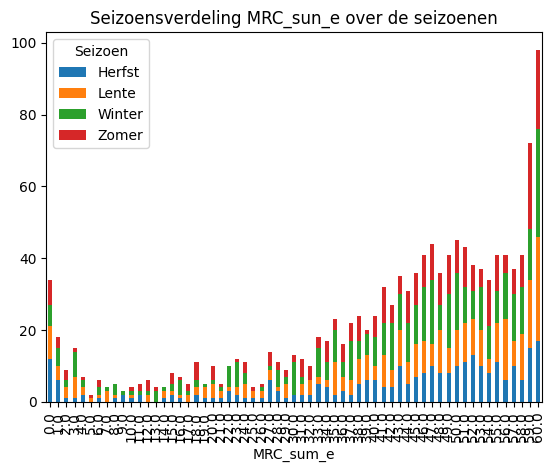

In [226]:
frequentietabellen=[]

for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['MRC_sum_e'], dateframe['Seizoen']) 
    frequentietabellen.append(freq_table)
    print(freq_table, '\n')

combined_freq_table = pd.concat(frequentietabellen)

combined_freq_table = combined_freq_table.groupby(combined_freq_table.index).sum()

combined_freq_table.plot(kind='bar', stacked=True).set_title('Seizoensverdeling MRC_sun_e over de seizoenen')


In [124]:
stats.shapiro(df['MRC_sum_e'].dropna())

ShapiroResult(statistic=0.8730776039703999, pvalue=2.4537562184052197e-31)

Niet normaal verdeeld, kan geen anova uitvoeren, dus pair wise t-toets

#### MRC_sum_e

In [125]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_mrc_e = df_lente['MRC_sum_e'].dropna()

In [126]:
df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_mrc_e = df_zomer['MRC_sum_e'].dropna()

In [127]:
df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_mrc_e = df_herfst['MRC_sum_e'].dropna()

In [128]:
df_winter = df[df['Seizoen']=='Winter']
df_winter_mrc_e = df_winter['MRC_sum_e'].dropna()

In [129]:
stats.ttest_ind(df_lente_mrc_e, df_zomer_mrc_e)

TtestResult(statistic=-0.39757875672765325, pvalue=0.691075822060262, df=628.0)

In [130]:
stats.ttest_ind(df_lente_mrc_e, df_herfst_mrc_e)

TtestResult(statistic=0.1714619466519498, pvalue=0.8639180720441522, df=603.0)

In [131]:
stats.ttest_ind(df_lente_mrc_e, df_winter_mrc_e)

TtestResult(statistic=0.13405129366917592, pvalue=0.8933993191443476, df=723.0)

In [132]:
stats.ttest_ind(df_zomer_mrc_e, df_herfst_mrc_e)

TtestResult(statistic=0.5569441319781446, pvalue=0.5777823099944885, df=575.0)

In [133]:
stats.ttest_ind(df_zomer_mrc_e, df_winter_mrc_e)

TtestResult(statistic=0.5673307415975231, pvalue=0.5706726938155942, df=695.0)

In [134]:
stats.ttest_ind(df_herfst_mrc_e, df_winter_mrc_e)

TtestResult(statistic=-0.05805695778196899, pvalue=0.9537205696650011, df=670.0)

#### Klimaat A

In [135]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_A = df_lente[df_lente['klimaat'] == 'A Klimaat']
df_lente_A_mrc_e = df_lente_A['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_A = df_zomer[df_zomer['klimaat'] == 'A Klimaat']
df_zomer_A_mrc_e = df_zomer_A['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_A = df_herfst[df_herfst['klimaat'] == 'A Klimaat']
df_herfst_A_mrc_e = df_herfst_A['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_A = df_winter[df_winter['klimaat'] == 'A Klimaat']
df_winter_A_mrc_e = df_winter_A['MRC_sum_e'].dropna()

In [136]:
stats.ttest_ind(df_lente_A_mrc_e, df_zomer_A_mrc_e)

TtestResult(statistic=0.17242488216799798, pvalue=0.8634591012214874, df=98.0)

In [137]:
stats.ttest_ind(df_lente_A_mrc_e, df_herfst_A_mrc_e)

TtestResult(statistic=-1.0786385437724213, pvalue=0.28329306846230157, df=102.0)

In [138]:
stats.ttest_ind(df_lente_A_mrc_e, df_winter_A_mrc_e)

TtestResult(statistic=1.1364706255999273, pvalue=0.2582294568802948, df=110.0)

In [139]:
stats.ttest_ind(df_zomer_A_mrc_e, df_herfst_A_mrc_e)

TtestResult(statistic=-1.2204771919139683, pvalue=0.22554438758770223, df=88.0)

In [140]:
stats.ttest_ind(df_zomer_A_mrc_e, df_winter_A_mrc_e)

TtestResult(statistic=0.9013189359356611, pvalue=0.3696744547361226, df=96.0)

In [141]:
stats.ttest_ind(df_herfst_A_mrc_e, df_winter_A_mrc_e)

TtestResult(statistic=2.2572419809606656, pvalue=0.02616769803687231, df=100.0)

#### Klimaat B

In [142]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_B = df_lente[df_lente['klimaat'] == 'B Klimaat']
df_lente_B_mrc_e = df_lente_B['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_lente_B = df_zomer[df_zomer['klimaat'] == 'B Klimaat']
df_zomer_B_mrc_e = df_lente_B['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_B = df_herfst[df_herfst['klimaat'] == 'B Klimaat']
df_herfst_B_mrc_e = df_herfst_B['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_B = df_winter[df_winter['klimaat'] == 'B Klimaat']
df_winter_B_mrc_e = df_winter_B['MRC_sum_e'].dropna()

In [143]:
stats.ttest_ind(df_lente_B_mrc_e, df_zomer_B_mrc_e)

TtestResult(statistic=-0.18327905398621444, pvalue=0.8555535031799216, df=38.0)

In [144]:
stats.ttest_ind(df_lente_B_mrc_e, df_herfst_B_mrc_e)

TtestResult(statistic=1.033028811537846, pvalue=0.30764564707740544, df=41.0)

In [145]:
stats.ttest_ind(df_lente_B_mrc_e, df_winter_B_mrc_e)

TtestResult(statistic=0.47408291956988513, pvalue=0.6376358883993379, df=47.0)

In [146]:
stats.ttest_ind(df_zomer_B_mrc_e, df_herfst_B_mrc_e)

TtestResult(statistic=1.4284997650597513, pvalue=0.16201197401776413, df=35.0)

In [147]:
stats.ttest_ind(df_zomer_B_mrc_e, df_winter_B_mrc_e)

TtestResult(statistic=0.6715852286200144, pvalue=0.5056144318763897, df=41.0)

In [148]:
stats.ttest_ind(df_herfst_B_mrc_e, df_winter_B_mrc_e)

TtestResult(statistic=-0.5319801326759199, pvalue=0.5974158026292029, df=44.0)

#### Klimaat C

In [149]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_C = df_lente[df_lente['klimaat'] == 'C Klimaat']
df_lente_C_mrc_e = df_lente_C['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_C = df_zomer[df_zomer['klimaat'] == 'C Klimaat']
df_zomer_C_mrc_e = df_zomer_C['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_C = df_herfst[df_herfst['klimaat'] == 'C Klimaat']
df_herfst_C_mrc_e = df_herfst_C['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_C = df_winter[df_winter['klimaat'] == 'C Klimaat']
df_winter_C_mrc_e = df_winter_C['MRC_sum_e'].dropna()

In [150]:
stats.ttest_ind(df_lente_C_mrc_e, df_zomer_C_mrc_e)

TtestResult(statistic=-0.4665918059121626, pvalue=0.6410321604121328, df=423.0)

In [151]:
stats.ttest_ind(df_lente_C_mrc_e, df_herfst_C_mrc_e)

TtestResult(statistic=0.8203206562946813, pvalue=0.4125396097158809, df=386.0)

In [152]:
stats.ttest_ind(df_lente_C_mrc_e, df_winter_C_mrc_e)

TtestResult(statistic=-0.10746013555448691, pvalue=0.914468478833161, df=484.0)

In [153]:
stats.ttest_ind(df_zomer_C_mrc_e, df_herfst_C_mrc_e)

TtestResult(statistic=1.243011261448791, pvalue=0.21463618021655542, df=377.0)

In [154]:
stats.ttest_ind(df_zomer_C_mrc_e, df_winter_C_mrc_e)

TtestResult(statistic=0.39399671542890735, pvalue=0.6937602756370076, df=475.0)

In [155]:
stats.ttest_ind(df_herfst_C_mrc_e, df_winter_C_mrc_e)

TtestResult(statistic=-0.9799161964623329, pvalue=0.32766842353413617, df=438.0)

#### Klimaat D

In [156]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_D = df_lente[df_lente['klimaat'] == 'D Klimaat']
df_lente_D_mrc_e = df_lente_D['MRC_sum_e'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_D = df_zomer[df_zomer['klimaat'] == 'D Klimaat']
df_zomer_D_mrc_e = df_zomer_D['MRC_sum_e'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_D = df_herfst[df_herfst['klimaat'] == 'D Klimaat']
df_herfst_D_mrc_e = df_herfst_D['MRC_sum_e'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_D = df_winter[df_winter['klimaat'] == 'D Klimaat']
df_winter_D_mrc_e = df_winter_D['MRC_sum_e'].dropna()

In [157]:
stats.ttest_ind(df_lente_D_mrc_e, df_zomer_D_mrc_e)

TtestResult(statistic=-0.016804788828928795, pvalue=0.9866454567918623, df=63.0)

In [158]:
stats.ttest_ind(df_lente_D_mrc_e, df_herfst_D_mrc_e)

TtestResult(statistic=-0.5697289124425807, pvalue=0.5707390277738525, df=68.0)

In [159]:
stats.ttest_ind(df_lente_D_mrc_e, df_winter_D_mrc_e)

TtestResult(statistic=-0.6825428934509726, pvalue=0.49697091615411093, df=76.0)

In [160]:
stats.ttest_ind(df_zomer_D_mrc_e, df_herfst_D_mrc_e)

TtestResult(statistic=-0.6168479380090852, pvalue=0.5393651278519493, df=69.0)

In [161]:
stats.ttest_ind(df_zomer_D_mrc_e, df_winter_D_mrc_e)

TtestResult(statistic=-0.7503812459298587, pvalue=0.455312012931955, df=77.0)

In [162]:
stats.ttest_ind(df_herfst_D_mrc_e, df_winter_D_mrc_e)

TtestResult(statistic=-0.014590601947543799, pvalue=0.988394238584568, df=82.0)

#### MRC_sum_w1

In [163]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_mrc_w1 = df_lente['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_mrc_w1 = df_zomer['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_mrc_w1 = df_herfst['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_mrc_w1 = df_winter['MRC_sum_w1'].dropna()

In [164]:
stats.ttest_ind(df_lente_mrc_w1, df_zomer_mrc_w1)

TtestResult(statistic=0.3071328590259369, pvalue=0.7588442266504682, df=627.0)

In [165]:
stats.ttest_ind(df_lente_mrc_w1, df_herfst_mrc_w1)

TtestResult(statistic=0.774257794460052, pvalue=0.43908081575201874, df=605.0)

In [166]:
stats.ttest_ind(df_lente_mrc_w1, df_winter_mrc_w1)

TtestResult(statistic=-0.1243350969600249, pvalue=0.9010843760657088, df=726.0)

In [167]:
stats.ttest_ind(df_zomer_mrc_w1, df_herfst_mrc_w1)

TtestResult(statistic=0.4583728920876599, pvalue=0.6468574510140936, df=576.0)

In [168]:
stats.ttest_ind(df_zomer_mrc_w1, df_winter_mrc_w1)

TtestResult(statistic=-0.45087067621335675, pvalue=0.6522229863816218, df=697.0)

In [169]:
stats.ttest_ind(df_herfst_mrc_w1, df_winter_mrc_w1)

TtestResult(statistic=-0.9502849184182766, pvalue=0.3423076184472841, df=675.0)

#### klimaat A

In [170]:
df_lente = df[df['Seizoen']=='Lente']
df_lente_A = df_lente[df_lente['klimaat'] == 'A Klimaat']
df_lente_A_mrc_w1 = df_lente_A['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen']=='Zomer']
df_zomer_A = df_zomer[df_zomer['klimaat'] == 'A Klimaat']
df_zomer_A_mrc_w1 = df_zomer_A['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen']=='Herfst']
df_herfst_A = df_herfst[df_herfst['klimaat'] == 'A Klimaat']
df_herfst_A_mrc_w1 = df_herfst_A['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen']=='Winter']
df_winter_A = df_winter[df_winter['klimaat'] == 'A Klimaat']
df_winter_A_mrc_w1 = df_winter_A['MRC_sum_w1'].dropna()

In [171]:
stats.ttest_ind(df_lente_A_mrc_w1, df_zomer_A_mrc_w1)

TtestResult(statistic=0.25707234235866666, pvalue=0.7976618948000251, df=98.0)

In [172]:
stats.ttest_ind(df_lente_A_mrc_w1, df_herfst_A_mrc_w1)

TtestResult(statistic=0.013424731872638235, pvalue=0.9893154179334995, df=101.0)

In [173]:
stats.ttest_ind(df_lente_A_mrc_w1, df_winter_A_mrc_w1)

TtestResult(statistic=0.2101057363787433, pvalue=0.8339703243969361, df=111.0)

In [174]:
stats.ttest_ind(df_zomer_A_mrc_w1, df_herfst_A_mrc_w1)

TtestResult(statistic=-0.24124609410439599, pvalue=0.8099320504762414, df=87.0)

In [175]:
stats.ttest_ind(df_zomer_A_mrc_w1, df_winter_A_mrc_w1)

TtestResult(statistic=-0.0660884642346625, pvalue=0.9474434170727098, df=97.0)

In [176]:
stats.ttest_ind(df_herfst_A_mrc_w1, df_winter_A_mrc_w1)

TtestResult(statistic=0.19219708650487924, pvalue=0.8479775856752815, df=100.0)

#### klimaat B

In [177]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_B = df_lente[df_lente['klimaat'] == 'B Klimaat']
df_lente_B_mrc_w1 = df_lente_B['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_B = df_zomer[df_zomer['klimaat'] == 'B Klimaat']
df_zomer_B_mrc_w1 = df_zomer_B['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_B = df_herfst[df_herfst['klimaat'] == 'B Klimaat']
df_herfst_B_mrc_w1 = df_herfst_B['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_B = df_winter[df_winter['klimaat'] == 'B Klimaat']
df_winter_B_mrc_w1 = df_winter_B['MRC_sum_w1'].dropna()

In [178]:
stats.ttest_ind(df_lente_B_mrc_w1, df_zomer_B_mrc_w1)

TtestResult(statistic=0.40544593733352885, pvalue=0.6874235463106204, df=38.0)

In [179]:
stats.ttest_ind(df_lente_B_mrc_w1, df_herfst_B_mrc_w1)

TtestResult(statistic=1.8979091416018778, pvalue=0.06476407210243663, df=41.0)

In [180]:
stats.ttest_ind(df_lente_B_mrc_w1, df_winter_B_mrc_w1)

TtestResult(statistic=0.7122328871825775, pvalue=0.4797683687592853, df=48.0)

In [181]:
stats.ttest_ind(df_zomer_B_mrc_w1, df_herfst_B_mrc_w1)

TtestResult(statistic=1.272760625555293, pvalue=0.21149298969221114, df=35.0)

In [182]:
stats.ttest_ind(df_zomer_B_mrc_w1, df_winter_B_mrc_w1)

TtestResult(statistic=0.24554732620277311, pvalue=0.8072286082018467, df=42.0)

In [183]:
stats.ttest_ind(df_herfst_B_mrc_w1, df_winter_B_mrc_w1)

TtestResult(statistic=-1.04195821739505, pvalue=0.30299679066497803, df=45.0)

#### klimaat C

In [184]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_C = df_lente[df_lente['klimaat'] == 'C Klimaat']
df_lente_C_mrc_w1 = df_lente_C['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_C = df_zomer[df_zomer['klimaat'] == 'C Klimaat']
df_zomer_C_mrc_w1 = df_zomer_C['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_C = df_herfst[df_herfst['klimaat'] == 'C Klimaat']
df_herfst_C_mrc_w1 = df_herfst_C['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_C = df_winter[df_winter['klimaat'] == 'C Klimaat']
df_winter_C_mrc_w1 = df_winter_C['MRC_sum_w1'].dropna()

In [185]:
stats.ttest_ind(df_lente_C_mrc_w1, df_zomer_C_mrc_w1)

TtestResult(statistic=0.2913313736817593, pvalue=0.770941376502027, df=421.0)

In [186]:
stats.ttest_ind(df_lente_C_mrc_w1, df_herfst_C_mrc_w1)

TtestResult(statistic=0.7357735371568026, pvalue=0.46231307898587837, df=388.0)

In [187]:
stats.ttest_ind(df_lente_C_mrc_w1, df_winter_C_mrc_w1)

TtestResult(statistic=-0.4309497389700735, pvalue=0.6666971730277003, df=483.0)

In [188]:
stats.ttest_ind(df_zomer_C_mrc_w1, df_herfst_C_mrc_w1)

TtestResult(statistic=0.4464562176474614, pvalue=0.6555227105648808, df=379.0)

In [189]:
stats.ttest_ind(df_zomer_C_mrc_w1, df_winter_C_mrc_w1)

TtestResult(statistic=-0.7346311212787783, pvalue=0.4629274506559271, df=474.0)

In [190]:
stats.ttest_ind(df_herfst_C_mrc_w1, df_winter_C_mrc_w1)

TtestResult(statistic=-1.1922072974096698, pvalue=0.23382109850546126, df=441.0)

#### klimaat D

In [191]:
df_lente = df[df['Seizoen'] == 'Lente']
df_lente_D = df_lente[df_lente['klimaat'] == 'D Klimaat']
df_lente_D_mrc_w1 = df_lente_D['MRC_sum_w1'].dropna()

df_zomer = df[df['Seizoen'] == 'Zomer']
df_zomer_D = df_zomer[df_zomer['klimaat'] == 'D Klimaat']
df_zomer_D_mrc_w1 = df_zomer_D['MRC_sum_w1'].dropna()

df_herfst = df[df['Seizoen'] == 'Herfst']
df_herfst_D = df_herfst[df_herfst['klimaat'] == 'D Klimaat']
df_herfst_D_mrc_w1 = df_herfst_D['MRC_sum_w1'].dropna()

df_winter = df[df['Seizoen'] == 'Winter']
df_winter_D = df_winter[df_winter['klimaat'] == 'D Klimaat']
df_winter_D_mrc_w1 = df_winter_D['MRC_sum_w1'].dropna()

In [192]:
stats.ttest_ind(df_lente_D_mrc_w1, df_zomer_D_mrc_w1)

TtestResult(statistic=-0.17130496051823696, pvalue=0.8645244555424378, df=64.0)

In [193]:
stats.ttest_ind(df_lente_D_mrc_w1, df_herfst_D_mrc_w1)

TtestResult(statistic=-0.38869379458649883, pvalue=0.6986995097592751, df=69.0)

In [194]:
stats.ttest_ind(df_lente_D_mrc_w1, df_winter_D_mrc_w1)

TtestResult(statistic=0.21638969716192966, pvalue=0.8292489292216977, df=78.0)

In [195]:
stats.ttest_ind(df_zomer_D_mrc_w1, df_herfst_D_mrc_w1)

TtestResult(statistic=-0.23063332393232183, pvalue=0.8182821372586427, df=69.0)

In [196]:
stats.ttest_ind(df_zomer_D_mrc_w1, df_winter_D_mrc_w1)

TtestResult(statistic=0.43573013596206966, pvalue=0.664236037815307, df=78.0)

In [197]:
stats.ttest_ind(df_herfst_D_mrc_w1, df_winter_D_mrc_w1)

TtestResult(statistic=0.701657523344908, pvalue=0.4848555988107951, df=83.0)

#### GBSDS_e

In [198]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['GBSDS_e'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
1.0           1      5       0      1
2.0           8      4       4      4
3.0           4      8       7      7
4.0          28     34      36     25
5.0           6      7      10      6 

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
1.0           0      1       1      3
2.0           4     10       5      6
3.0           4      4       7      0
4.0          11      7      14      9
5.0           0      1       0      0 

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
0.0           4      3       2      3
1.0           7      9       7      9
2.0          36     47      63     56
3.0          35     38      65     31
4.0          77    109     118     95
5.0          14     11      15     13 

Seizoen  Herfst  Lente  Winter  Zomer
GBSDS_e                              
1.0           2      3       3      1
2.0           7      6       4      5
3.0   

In [199]:
freq_table = pd.crosstab(df['GBSDS_e'], df['Seizoen']) 
freq_table

Seizoen,Herfst,Lente,Winter,Zomer
GBSDS_e,,,,
0.0,4,3,2,3
1.0,10,18,11,14
2.0,55,67,76,71
3.0,56,60,91,51
4.0,128,160,193,140
5.0,24,23,27,23


In [200]:
df_GBSDS_e = df
df_C_GBSDS_e = df_C

In [201]:
df_GBSDS_e = df_GBSDS_e.drop(df_GBSDS_e[df_GBSDS_e['GBSDS_e'] == 0].index)
df_C_GBSDS_e = df_C_GBSDS_e.drop(df_C_GBSDS_e[df_C_GBSDS_e['GBSDS_e'] == 0].index)

In [202]:
df_GBSDS_e_seizoen = pd.crosstab(df_GBSDS_e['GBSDS_e'], df_GBSDS_e['Seizoen'])
stats.chi2_contingency(df_GBSDS_e_seizoen)

Chi2ContingencyResult(statistic=10.212860375521586, pvalue=0.5972926045872373, dof=12, expected_freq=array([[ 11.14714946,  13.39291217,  16.25115562,  12.20878274],
       [ 56.5770416 ,  67.97534669,  82.48228043,  61.96533128],
       [ 54.26348228,  65.19568567,  79.10939908,  59.43143297],
       [130.61093991, 156.92449923, 190.41448382, 143.05007704],
       [ 20.40138675,  24.51155624,  29.74268105,  22.34437596]]))

In [203]:
df_C_GBSDS_e_seizoen = pd.crosstab(df_C_GBSDS_e['GBSDS_e'], df_C_GBSDS_e['Seizoen'])
stats.chi2_contingency(df_C_GBSDS_e_seizoen)

Chi2ContingencyResult(statistic=11.673252938797496, pvalue=0.4722649728649131, dof=12, expected_freq=array([[  6.3251462 ,   8.00935673,  10.03040936,   7.63508772],
       [ 39.92748538,  50.55906433,  63.31695906,  48.19649123],
       [ 33.40467836,  42.2994152 ,  52.97309942,  40.32280702],
       [ 78.86666667,  99.86666667, 125.06666667,  95.2       ],
       [ 10.47602339,  13.26549708,  16.6128655 ,  12.64561404]]))

#### GBSDS_w1

In [204]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['GBSDS_w1'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
1.0            1      2       2      1
2.0            9     16       5      7
3.0            8      4      11      7
4.0           21     25      27     18
5.0            8     10      12     10 

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
0.0            1      0       0      0
1.0            1      2       2      3
2.0            3     10       7      6
3.0            3      6       9      3
4.0           12      4       7      3
5.0            0      2       2      2 

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
0.0            3      4       5      4
1.0           13     19      16     20
2.0           35     49      64     46
3.0           37     44      62     36
4.0           63     74      89     70
5.0           23     27      32     30 

Seizoen   Herfst  Lente  Winter  Zomer
GBSDS_w1                              
1.0            3   

In [205]:
freq_table = pd.crosstab(df['GBSDS_w1'], df['Seizoen']) 
freq_table

Seizoen,Herfst,Lente,Winter,Zomer
GBSDS_w1,,,,
0.0,4,4,5,4
1.0,18,28,25,28
2.0,58,81,84,66
3.0,57,65,90,52
4.0,106,109,141,104
5.0,35,44,54,46


In [206]:
df_GBSDS_w1 = df
df_C_GBSDS_w1 = df_C

In [207]:
df_GBSDS_w1 = df_GBSDS_w1.drop(df_GBSDS_w1[df_GBSDS_w1['GBSDS_w1'] == 0].index)
df_C_GBSDS_w1 = df_C_GBSDS_w1.drop(df_C_GBSDS_w1[df_C_GBSDS_w1['GBSDS_w1'] == 0].index)

In [208]:
df_GBSDS_w1_seizoen = pd.crosstab(df_GBSDS_w1['GBSDS_w1'], df_GBSDS_w1['Seizoen'])
stats.chi2_contingency(df_GBSDS_w1_seizoen)

Chi2ContingencyResult(statistic=8.605349528055823, pvalue=0.7362177942060986, dof=12, expected_freq=array([[ 21.0116189 ,  25.07591015,  30.21378776,  22.69868319],
       [ 61.3369481 ,  73.20139427,  88.19984508,  66.26181255],
       [ 56.03098373,  66.86909373,  80.5701007 ,  60.52982184],
       [ 97.62974438, 116.51432998, 140.38729667, 105.46862897],
       [ 37.99070488,  45.33927188,  54.62896979,  41.04105345]]))

In [209]:
df_C_GBSDS_w1_seizoen = pd.crosstab(df_C_GBSDS_w1['GBSDS_w1'], df_C_GBSDS_w1['Seizoen'])
stats.chi2_contingency(df_C_GBSDS_w1_seizoen)

Chi2ContingencyResult(statistic=5.850671248543038, pvalue=0.9234215659356688, dof=12, expected_freq=array([[13.69611307, 17.06007067, 21.0647821 , 16.17903416],
       [39.07420495, 48.67137809, 60.09658422, 46.15783274],
       [36.05300353, 44.90812721, 55.44994111, 42.58892815],
       [59.61837456, 74.2614841 , 91.69375736, 70.42638398],
       [22.55830389, 28.09893993, 34.69493522, 26.64782097]]))

#### Surv_unable_to_walk

In [210]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Surv_unable_to_walk'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                         6      8       4      3
1                        41     50      53     40 

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                         4      9       3      9
1                        16     15      24      9 

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                        33     45      59     57
1                       142    173     212    151 

Seizoen              Herfst  Lente  Winter  Zomer
Surv_unable_to_walk                              
0                         9      9       7      4
1                        29     24      40     30 



In [211]:
df_Surv_unable_to_walk = pd.crosstab(df['Surv_unable_to_walk'], df['Seizoen'])
stats.chi2_contingency(df_Surv_unable_to_walk)

Chi2ContingencyResult(statistic=4.535997817235742, pvalue=0.209101751712839, dof=3, expected_freq=array([[ 57.14719272,  67.96433991,  82.04704097,  61.8414264 ],
       [222.85280728, 265.03566009, 319.95295903, 241.1585736 ]]))

In [212]:
df_B_Surv_unable_to_walk = pd.crosstab(df_B['Surv_unable_to_walk'], df_B['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk)

Chi2ContingencyResult(statistic=9.831255208333332, pvalue=0.020056357182502475, dof=3, expected_freq=array([[ 5.61797753,  6.74157303,  7.58426966,  5.05617978],
       [14.38202247, 17.25842697, 19.41573034, 12.94382022]]))

In [213]:
df_C_Surv_unable_to_walk = pd.crosstab(df_C['Surv_unable_to_walk'], df_C['Seizoen'])
stats.chi2_contingency(df_C_Surv_unable_to_walk)

Chi2ContingencyResult(statistic=4.720218826077955, pvalue=0.19346847447480825, dof=3, expected_freq=array([[ 38.93348624,  48.5       ,  60.2912844 ,  46.27522936],
       [136.06651376, 169.5       , 210.7087156 , 161.72477064]]))

Post hoc voor df_B_Surv_unable_to_walk

In [214]:
df_B_LenZom = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Zomer')]
df_B_LenHer = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Herfst')]
df_B_LenWin = df_B[(df_B['Seizoen'] == 'Lente') | (df_B['Seizoen'] == 'Winter')]
df_B_ZomHer = df_B[(df_B['Seizoen'] == 'Zomer') | (df_B['Seizoen'] == 'Herfst')]
df_B_ZomWin = df_B[(df_B['Seizoen'] == 'Zomer') | (df_B['Seizoen'] == 'Winter')]
df_B_HerWin = df_B[(df_B['Seizoen'] == 'Herfst') | (df_B['Seizoen'] == 'Winter')]

In [215]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenZom['Surv_unable_to_walk'], df_B_LenZom['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

Chi2ContingencyResult(statistic=0.24508101851851882, pvalue=0.6205601813347754, dof=1, expected_freq=array([[10.28571429,  7.71428571],
       [13.71428571, 10.28571429]]))

In [216]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenHer['Surv_unable_to_walk'], df_B_LenHer['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

Chi2ContingencyResult(statistic=0.8743589743589744, pvalue=0.3497513801303367, dof=1, expected_freq=array([[ 5.90909091,  7.09090909],
       [14.09090909, 16.90909091]]))

In [217]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_LenWin['Surv_unable_to_walk'], df_B_LenWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

Chi2ContingencyResult(statistic=3.5602074430199417, pvalue=0.05918034264755438, dof=1, expected_freq=array([[ 5.64705882,  6.35294118],
       [18.35294118, 20.64705882]]))

In [218]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_ZomHer['Surv_unable_to_walk'], df_B_ZomHer['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

Chi2ContingencyResult(statistic=2.572632478632479, pvalue=0.10872666332863937, dof=1, expected_freq=array([[ 6.84210526,  6.15789474],
       [13.15789474, 11.84210526]]))

In [219]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_ZomWin['Surv_unable_to_walk'], df_B_ZomWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

Chi2ContingencyResult(statistic=6.482007575757576, pvalue=0.010897183523382386, dof=1, expected_freq=array([[ 7.2,  4.8],
       [19.8, 13.2]]))

In [220]:
df_B_Surv_unable_to_walk_seiz = pd.crosstab(df_B_HerWin['Surv_unable_to_walk'], df_B_HerWin['Seizoen'])
stats.chi2_contingency(df_B_Surv_unable_to_walk_seiz)

Chi2ContingencyResult(statistic=0.1865856481481481, pvalue=0.6657736768726352, dof=1, expected_freq=array([[ 2.9787234,  4.0212766],
       [17.0212766, 22.9787234]]))

De statistische afhankelijkheid is te zien tussen de winter en zomer

Na bonferoni correctie is te concluderen dat het niet meer statistisch significant is